## Makeing Dummy Data and Pre-Processing

In [1]:
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
import pandas as pd

In [5]:
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label": y
                        })

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
import matplotlib.pyplot as plt

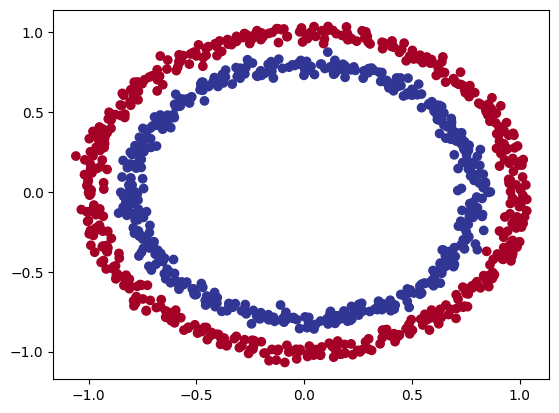

In [10]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

#### Turn data into tensors

In [13]:
import torch

In [14]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building a model

In [17]:
from torch import nn

In [19]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [21]:
model_0 = CircleModelV0()
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [23]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

#### Train Test Loop

In [25]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_0.train()
    # Forward Prop
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calc loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # Zero out gradient from previous epochs
    optimizer.zero_grad()

    # Perform back-prop
    loss.backward()

    # Adjust params 
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if (epoch % 10 == 0):
        print(f"Epoch: {epoch} | Loss: {loss}, Accuracy {acc} | Test Loss: {test_loss}, Test Accuracy {test_acc}")

Epoch: 0 | Loss: 0.6931560635566711, Accuracy 49.375 | Test Loss: 0.6933561563491821, Test Accuracy 50.0
Epoch: 10 | Loss: 0.6931094527244568, Accuracy 49.875 | Test Loss: 0.6935192346572876, Test Accuracy 48.5
Epoch: 20 | Loss: 0.6930752396583557, Accuracy 50.125 | Test Loss: 0.6936640739440918, Test Accuracy 49.5
Epoch: 30 | Loss: 0.6930500864982605, Accuracy 50.0 | Test Loss: 0.6937924027442932, Test Accuracy 49.5
Epoch: 40 | Loss: 0.6930315494537354, Accuracy 50.625 | Test Loss: 0.6939055919647217, Test Accuracy 47.5
Epoch: 50 | Loss: 0.6930179595947266, Accuracy 50.74999999999999 | Test Loss: 0.6940051913261414, Test Accuracy 46.0
Epoch: 60 | Loss: 0.6930078864097595, Accuracy 50.875 | Test Loss: 0.6940925717353821, Test Accuracy 46.5
Epoch: 70 | Loss: 0.6930005550384521, Accuracy 50.875 | Test Loss: 0.6941689848899841, Test Accuracy 46.0
Epoch: 80 | Loss: 0.6929951310157776, Accuracy 50.74999999999999 | Test Loss: 0.6942357420921326, Test Accuracy 45.5
Epoch: 90 | Loss: 0.6929910

In [27]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


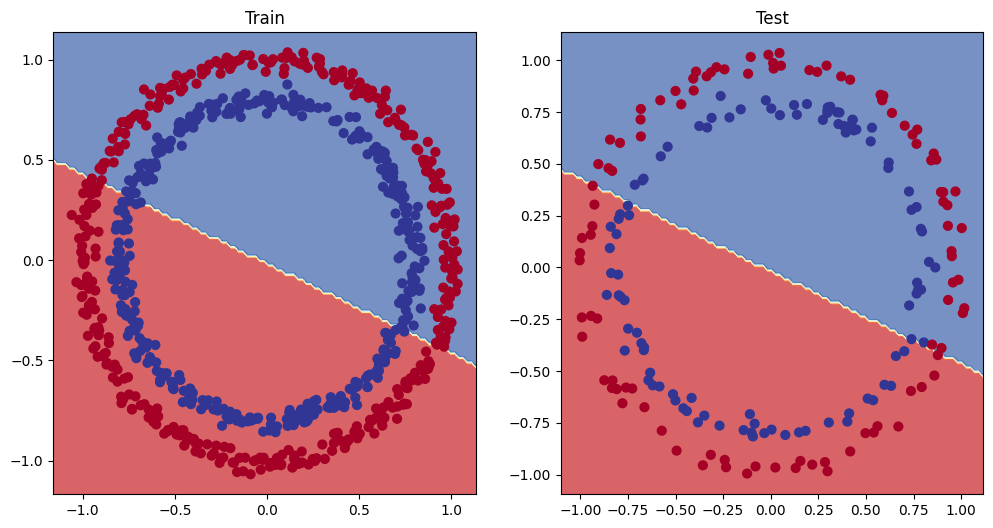

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [29]:


class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # note: always make sure forward is spelt correctly!
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [31]:
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [70]:
def train(model, epochs, X_train, y_train, x_test, y_test): 
    torch.manual_seed(42)

    for epoch in range(epochs):
        ### Training
        # 1. Forward pass
        y_logits = model(X_train)
        y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

        # 2. Calculate loss/accuracy
        loss = loss_fn(y_logits, y_train)
        acc = accuracy_fn(y_true=y_train, 
                        y_pred=y_pred)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        ### Testing
        model_1.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_logits = model(X_test).squeeze() 
            test_pred = torch.round(torch.sigmoid(test_logits))
            # 2. Caculate loss/accuracy
            test_loss = loss_fn(test_logits,
                                y_test)
            test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)

        # Print out what's happening every 10 epochs
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [45]:
train(model_1, 1000, X_train, y_train, X_test, y_test)

Epoch: 0 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 100 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 200 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 300 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 400 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 500 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 600 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 700 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 800 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%
Epoch: 900 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69257, Test acc: 49.50%


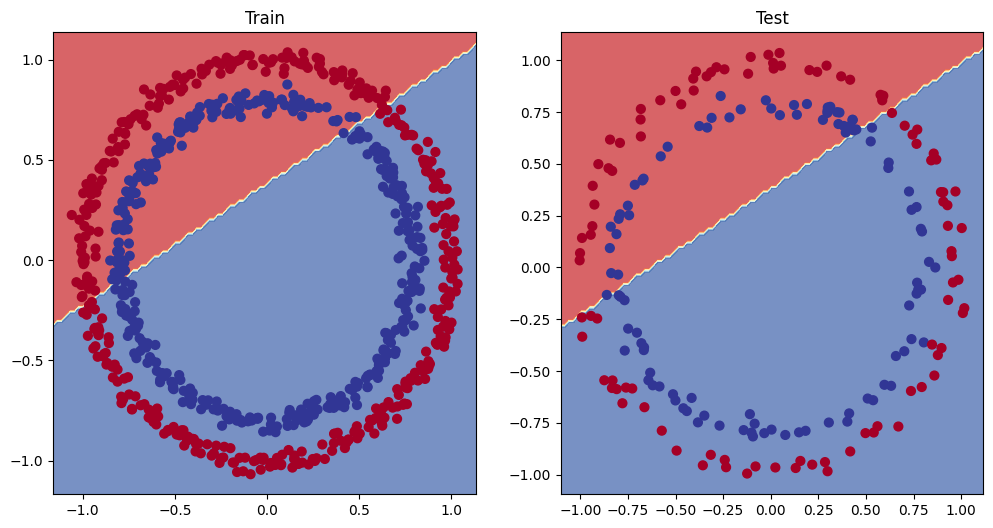

In [35]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


In [56]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [51]:
moons_model = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [59]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [61]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = moons_model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    moons_model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 100 | Loss: 0.48153, Accuracy: 93.50% | Test Loss: 0.49935, Test Accuracy: 90.50%
Epoch: 200 | Loss: 0.37056, Accuracy: 97.75% | Test Loss: 0.40595, Test Accuracy: 92.00%
Epoch: 300 | Loss: 0.25458, Accuracy: 99.00% | Test Loss: 0.30333, Test Accuracy: 96.50%
Epoch: 400 | Loss: 0.17180, Accuracy: 99.50% | Test Loss: 0.22108, Test Accuracy: 97.50%
Epoch: 500 | Loss: 0.12188, Accuracy: 99.62% | Test Loss: 0.16512, Test Accuracy: 99.00%
Epoch: 600 | Loss: 0.09123, Accuracy: 99.88% | Test Loss: 0.12741, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.07100, Accuracy: 99.88% | Test Loss: 0.10319, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.05773, Accuracy: 99.88% | Test Loss: 0.08672, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.04853, Accuracy: 99.88% | Test Loss: 0.07474, Test Accuracy: 99.50%


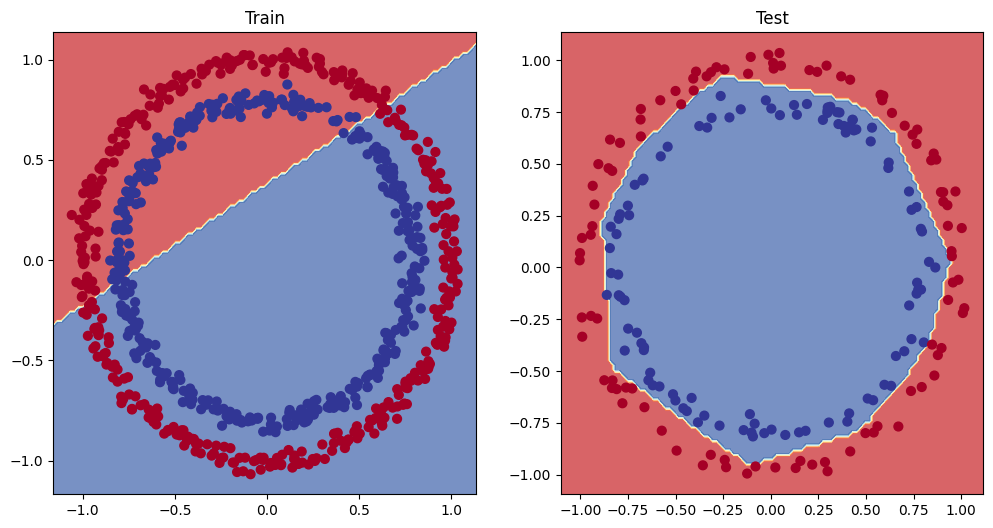

In [62]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = 

### Creating multi-class Classifcation Data

In [63]:
from sklearn.datasets import make_blobs

In [64]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

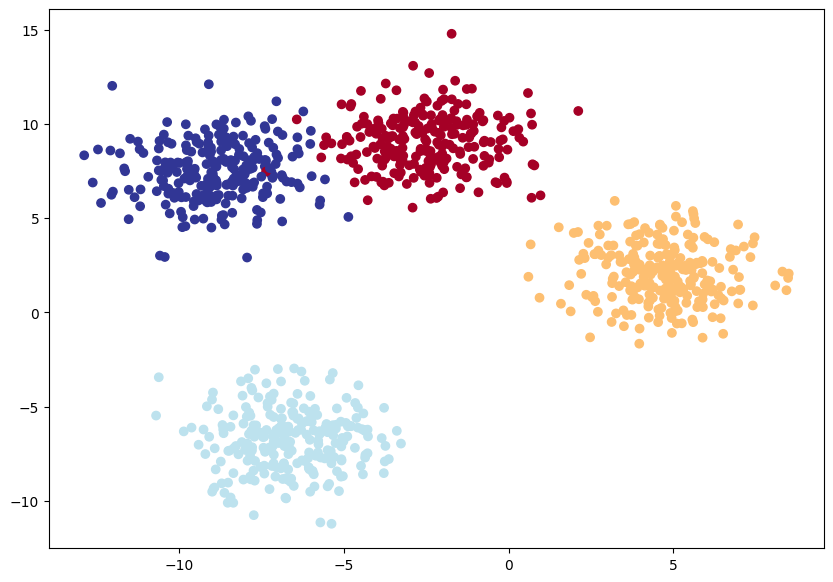

In [65]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


In [66]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_featuers, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_featuers)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [67]:
model_4 = BlobModel(input_features=NUM_FEATURES, output_featuers=NUM_CLASSES, hidden_units=16)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=4, bias=True)
  )
)

In [68]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [72]:
train(model_4, 100, X_blob_train, y_blob_train, X_blob_test, y_blob_test)

Epoch: 0 | Loss: 1.52733, Acc: 3.38% | Test Loss: 1.20977, Test Acc: 11.50%
Epoch: 10 | Loss: 0.35169, Acc: 98.50% | Test Loss: 0.31741, Test Acc: 100.00%
Epoch: 20 | Loss: 0.13269, Acc: 99.00% | Test Loss: 0.12279, Test Acc: 99.50%
Epoch: 30 | Loss: 0.07663, Acc: 99.00% | Test Loss: 0.06976, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05715, Acc: 99.00% | Test Loss: 0.05032, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04773, Acc: 99.00% | Test Loss: 0.04059, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04228, Acc: 99.00% | Test Loss: 0.03483, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03878, Acc: 99.00% | Test Loss: 0.03103, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03635, Acc: 99.00% | Test Loss: 0.02834, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03458, Acc: 99.00% | Test Loss: 0.02634, Test Acc: 99.50%


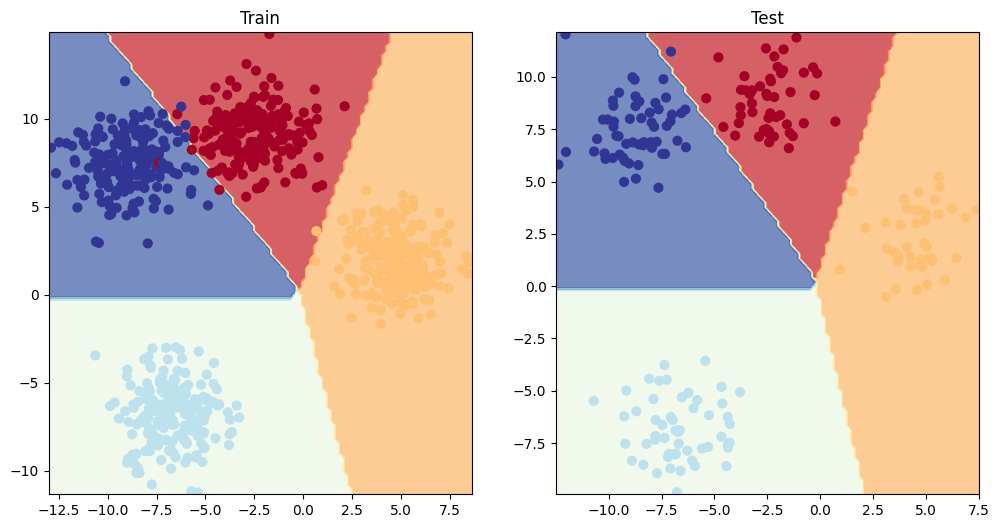

In [73]:


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


### Exercises

1) Make a binary classification dataset with Scikit-Learn's make_moons() function.

    For consistency, the dataset should have 1000 samples and a random_state=42.
    Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing

In [75]:
from sklearn.datasets import make_moons

In [133]:
X_moons, y_moons = make_moons(n_samples=1000, random_state=42)

X_moons = torch.from_numpy(X_moons).type(torch.float)
y_moons = torch.from_numpy(y_moons).type(torch.float)

In [134]:
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [135]:
X_moons_train.shape, X_moons_test.shape, y_moons_train.shape, y_moons_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [136]:
class MoonsClassifier(nn.Module):
    def __init__(self, input_features=2, output_features=1, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [137]:
moons_model = MoonsClassifier()
moons_model

MoonsClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [138]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(moons_model.parameters(), lr=0.1)

In [139]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = moons_model(X_moons_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
  

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_moons_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_moons_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    moons_model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = moons_model(X_moons_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_moons_test)
      test_acc = accuracy_fn(y_true=y_moons_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71196, Accuracy: 50.00% | Test Loss: 0.70563, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.36001, Accuracy: 84.50% | Test Loss: 0.37441, Test Accuracy: 83.00%
Epoch: 200 | Loss: 0.23690, Accuracy: 88.88% | Test Loss: 0.24050, Test Accuracy: 89.50%
Epoch: 300 | Loss: 0.21527, Accuracy: 89.88% | Test Loss: 0.21518, Test Accuracy: 91.50%
Epoch: 400 | Loss: 0.19347, Accuracy: 91.12% | Test Loss: 0.19230, Test Accuracy: 92.00%
Epoch: 500 | Loss: 0.15933, Accuracy: 93.12% | Test Loss: 0.15809, Test Accuracy: 93.00%
Epoch: 600 | Loss: 0.11417, Accuracy: 95.38% | Test Loss: 0.11280, Test Accuracy: 96.50%
Epoch: 700 | Loss: 0.07176, Accuracy: 98.50% | Test Loss: 0.06996, Test Accuracy: 98.00%
Epoch: 800 | Loss: 0.04407, Accuracy: 100.00% | Test Loss: 0.04219, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.02877, Accuracy: 100.00% | Test Loss: 0.02706, Test Accuracy: 100.00%


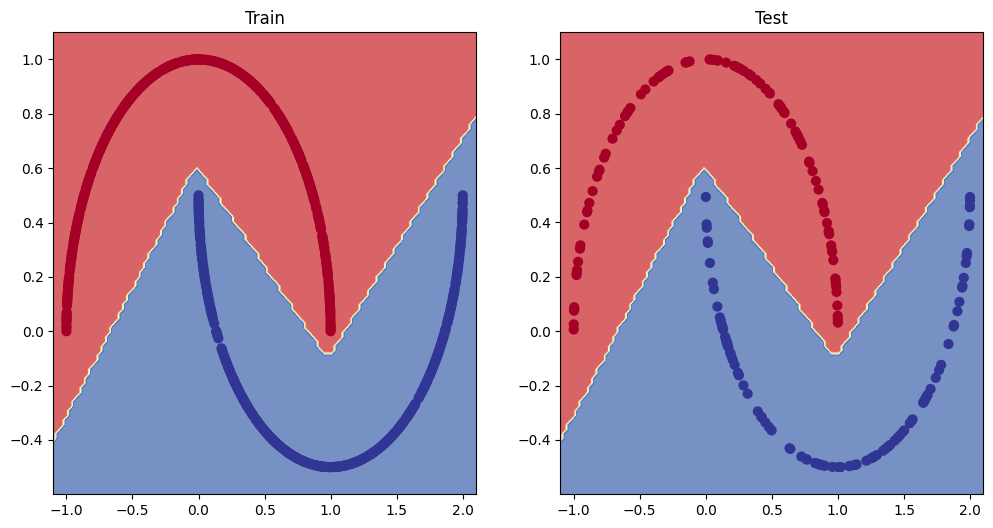

In [141]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moons_model, X_moons_train, y_moons_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moons_model, X_moons_test, y_moons_test)

In [142]:
# Creating the tanh function in pure pytorch

def tanh(z):
    return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))